In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


---
# VIDEO: Concept and uses of the inverse
---


In [2]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
idm = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(idm)

[[ 1.00000000e+00 -1.25680716e-15 -4.99600361e-16]
 [ 0.00000000e+00  1.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  1.94289029e-16  1.00000000e+00]]


In [ ]:
# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('AA$^{-1}$')

plt.show()


---
# VIDEO: Computing the inverse via row reduction
---


In [ ]:

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

In [ ]:
# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

In [ ]:
# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()


---
# VIDEO: Left inverse and right inverse
---


In [3]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# inspect ranks
print('Shape of A^TA:', np.shape(AtA) )
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) )
print('Shape of AA^T:', np.shape(AAt) )
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@A.T

# right inverse
Aright = A.T@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

print(I_left), print(' ')
print(I_right), print(' ')


# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt

print(I_AtA), print(' ')
print(I_AAt)

Shape of A^TA: (3, 3)
Rank of A^TA: 3
Shape of AA^T: (6, 6)
Rank of AA^T: 3
[[ 1.00000000e+00 -1.11022302e-16 -1.21430643e-17]
 [ 1.38777878e-16  1.00000000e+00  2.08166817e-17]
 [ 2.22044605e-16  5.55111512e-17  1.00000000e+00]]
 
[[ 1.91038075  0.1701465   0.11405216 -0.07806394 -0.09979564  0.21315395]
 [ 0.06528747  1.1049384  -0.21565148 -0.23323724  0.18869504  0.35864875]
 [-0.61505695  0.0760458  -0.03184191 -1.21170267  0.02786167  2.40748439]
 [ 0.52092386  0.94527439 -0.18891855  1.3684      0.16530373 -2.83125927]
 [-0.43133056  0.49374683 -0.10120522 -1.29696282  0.08855457  2.54332304]
 [ 0.01144344  0.33010844 -0.04159726 -0.98424406  0.0363976   1.9476895 ]]
 
[[ 1.00000000e+00  1.80411242e-16 -2.77555756e-17]
 [ 6.93889390e-17  1.00000000e+00  2.77555756e-17]
 [ 8.32667268e-17 -5.55111512e-17  1.00000000e+00]]
 
[[ 1.     0.5    1.    -1.     1.     1.   ]
 [ 1.     1.125  0.75   0.5    0.     0.   ]
 [-2.     0.     0.    -2.     0.     0.   ]
 [ 0.     0.25  -0.5    

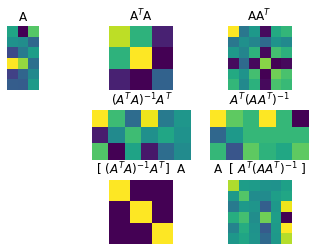

In [4]:
## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# VIDEO: The pseudoinverse, part 1
---


In [ ]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [ ]:
# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

In [ ]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()